In [ ]:
# Download the data
!gdown 11q5JaVOFB6CarFQhtdWEwKS4pL8SSD6s

Downloading...
From (original): https://drive.google.com/uc?id=11q5JaVOFB6CarFQhtdWEwKS4pL8SSD6s
From (redirected): https://drive.google.com/uc?id=11q5JaVOFB6CarFQhtdWEwKS4pL8SSD6s&confirm=t&uuid=adff6559-0ccd-402c-ba24-ee333742b5dc
To: /content/data.zip
100% 203M/203M [00:06<00:00, 32.3MB/s]


In [ ]:
# Extract the data (Upload it in the Colab session storage)
!unzip data.zip

Archive:  data.zip
   creating: data/
   creating: data/potholes/
  inflating: data/potholes/63.jpg    
  inflating: data/potholes/189.jpg   
  inflating: data/potholes/77.jpg    
  inflating: data/potholes/162.jpg   
  inflating: data/potholes/176.jpg   
  inflating: data/potholes/88.jpg    
  inflating: data/potholes/228.jpg   
  inflating: data/potholes/214.jpg   
  inflating: data/potholes/200.jpg   
  inflating: data/potholes/201.jpg   
  inflating: data/potholes/215.jpg   
  inflating: data/potholes/229.jpg   
  inflating: data/potholes/177.jpg   
  inflating: data/potholes/89.jpg    
  inflating: data/potholes/163.jpg   
  inflating: data/potholes/188.jpg   
  inflating: data/potholes/76.jpg    
  inflating: data/potholes/62.jpg    
  inflating: data/potholes/74.jpg    
  inflating: data/potholes/60.jpg    
  inflating: data/potholes/48.jpg    
  inflating: data/potholes/149.jpg   
  inflating: data/potholes/175.jpg   
  inflating: data/potholes/161.jpg   
  inflating: data/poth

In [ ]:
import subprocess
import sys

# Storing accuracy results for all models
results = {}

# Importing required packages for this project
required_packages = ["tensorflow", "keras", "opencv-python", "matplotlib", "pandas"]

for package in required_packages:
    try:
        __import__(package)
    except ImportError:
        subprocess.check_call([sys.executable, "-m", "pip", "install", package])


import tensorflow as tf
import cv2
import matplotlib.pyplot as plt

train_data = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1.0 / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2,
)
training_set = train_data.flow_from_directory(
    "data", target_size=(224, 224), batch_size=32,
    class_mode="binary",
    subset="training"
)
validation_set = train_data.flow_from_directory(
    "data", target_size=(224, 224),
    batch_size=32, class_mode="binary",
    subset="validation"
)

Found 546 images belonging to 2 classes.
Found 135 images belonging to 2 classes.


In [ ]:
cnn = tf.keras.models.Sequential()

# Convolutional Layer 1
cnn.add(
    tf.keras.layers.Conv2D(
        filters=32,
        kernel_size=(3, 3),
        activation="relu",
        input_shape=(224, 224, 3)
    )
)
cnn.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2))

# Convolutional Layer 2
cnn.add(
    tf.keras.layers.Conv2D(
        filters=64,
        kernel_size=(3, 3),
        activation="relu"
    )
)
cnn.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2))

# Convolutional Layer 3
cnn.add(
    tf.keras.layers.Conv2D(
        filters=128,
        kernel_size=(3, 3),
        activation="relu"
    )
)
cnn.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2))

cnn.add(tf.keras.layers.Flatten())

# Fully Connected Layer
cnn.add(tf.keras.layers.Dense(units=128, activation="relu"))
cnn.add(tf.keras.layers.Dropout(0.5))
cnn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))  # Binary classification

cnn.compile(
    optimizer="adam",  # Adam optimizer is commonly used
    loss="binary_crossentropy",  # Binary crossentropy for binary classification
    metrics=["accuracy"],  # Accuracy metric for evaluation
)

cnn.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,169,089 (42.61 MB)

 Trainable params: 11,169,089 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = cnn.fit(x=training_set, validation_data=validation_set, epochs=10, batch_size=16)
results["Baseline CNN"] = {'accuracy': history.history['val_accuracy'][-1]}

Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 21s 857ms/step - accuracy: 0.8823 - loss: 0.3026 - val_accuracy: 0.7407 - val_loss: 1.0391
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 39s 749ms/step - accuracy: 0.8019 - loss: 0.4675 - val_accuracy: 0.8000 - val_loss: 0.5490
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 18s 718ms/step - accuracy: 0.8743 - loss: 0.3202 - val_accuracy: 0.8370 - val_loss: 0.4390
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 17s 626ms/step - accuracy: 0.9084 - loss: 0.2360 - val_accuracy: 0.8222 - val_loss: 0.4498
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 18s 680ms/step - accuracy: 0.9114 - loss: 0.2163 - val_accuracy: 0.8444 - val_loss: 0.5549
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 19s 652ms/step - accuracy: 0.9052 - loss: 0.2306 - val_accuracy: 0.7926 - val_loss: 0.5612
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 19s 777ms/step - accuracy: 0.9417 - loss: 0.1951 - val_accuracy: 0.8370 - val_loss: 0.4626
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 18s 727ms/step - accuracy: 0.9170 - loss: 0.2134 - val_accu

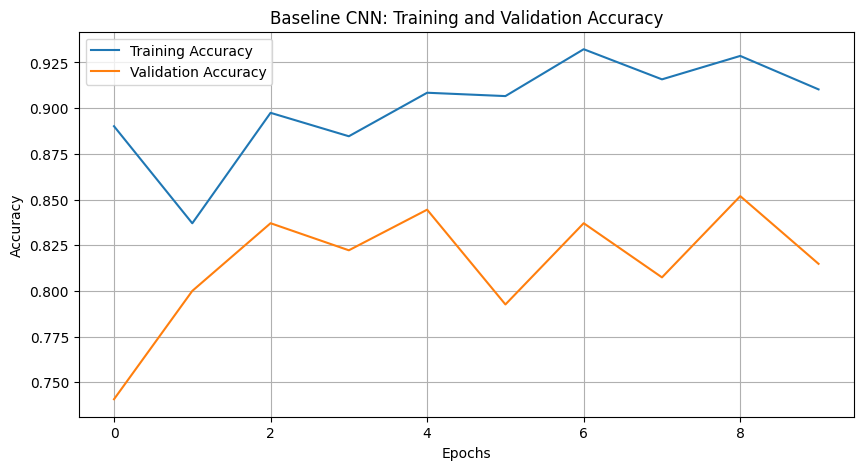

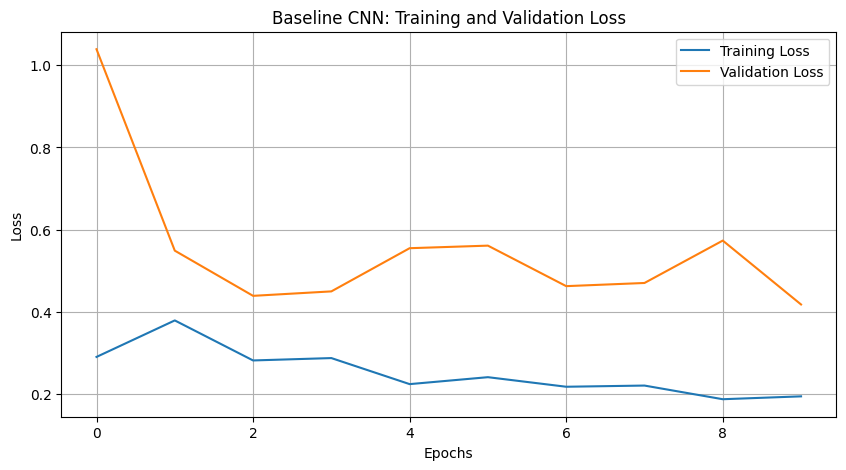

In [ ]:
# Plot Training and Validation Accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Baseline CNN: Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot Training and Validation Loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Baseline CNN: Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


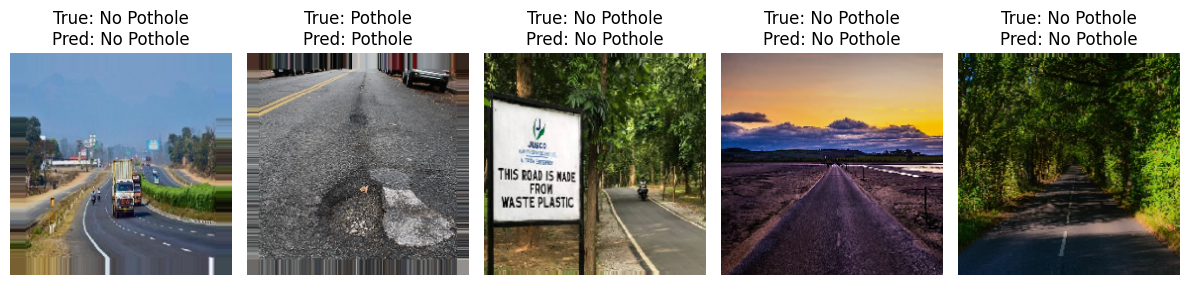

In [ ]:
# Get a batch of data from the validation set
images, labels = next(iter(validation_set))

# Predict using the trained CNN model
predictions = cnn.predict(images)
predicted_classes = (predictions > 0.5).astype(int)  # Threshold for binary classification

# Plot the first 5 images along with their true and predicted labels
plt.figure(figsize=(12, 8))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(images[i])
    plt.axis("off")
    true_label = "Pothole" if labels[i] == 1 else "No Pothole"
    predicted_label = "Pothole" if predicted_classes[i] == 1 else "No Pothole"
    plt.title(f"True: {true_label}\nPred: {predicted_label}")

plt.tight_layout()
plt.show()

In [ ]:
# Transfer Learning - VGG 16
vgg16 = tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
vgg16.trainable = False  # Freeze the pre-trained layers

vgg16_model = tf.keras.models.Sequential([
    vgg16,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

vgg16_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
vgg16_model.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,926,209 (68.38 MB)

 Trainable params: 3,211,521 (12.25 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
history = vgg16_model.fit(x=training_set, validation_data=validation_set, epochs=10)
results["VGG 16"] = {'accuracy': history.history['val_accuracy'][-1]}

Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 44s 1s/step - accuracy: 0.6168 - loss: 1.1699 - val_accuracy: 0.9333 - val_loss: 0.1863
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 20s 911ms/step - accuracy: 0.9393 - loss: 0.1742 - val_accuracy: 0.9407 - val_loss: 0.1574
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 20s 844ms/step - accuracy: 0.9366 - loss: 0.1592 - val_accuracy: 0.9481 - val_loss: 0.1061
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 18s 665ms/step - accuracy: 0.9562 - loss: 0.1333 - val_accuracy: 0.9704 - val_loss: 0.0897
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 19s 675ms/step - accuracy: 0.9617 - loss: 0.0891 - val_accuracy: 0.9556 - val_loss: 0.0973
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 20s 842ms/step - accuracy: 0.9814 - loss: 0.0752 - val_accuracy: 0.9556 - val_loss: 0.1216
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 19s 646ms/step - accuracy: 0.9874 - loss: 0.0548 - val_accuracy: 0.9704 - val_loss: 0.1125
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 18s 717ms/step - accuracy: 0.9770 - loss: 0.0628 - val_accurac

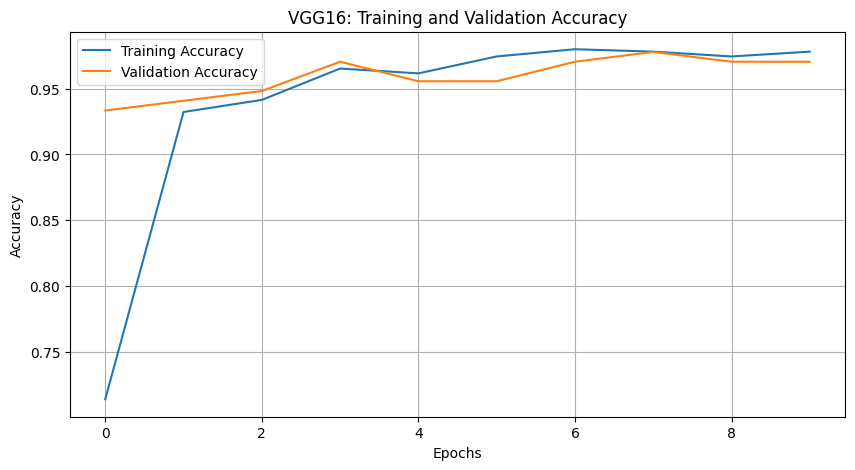

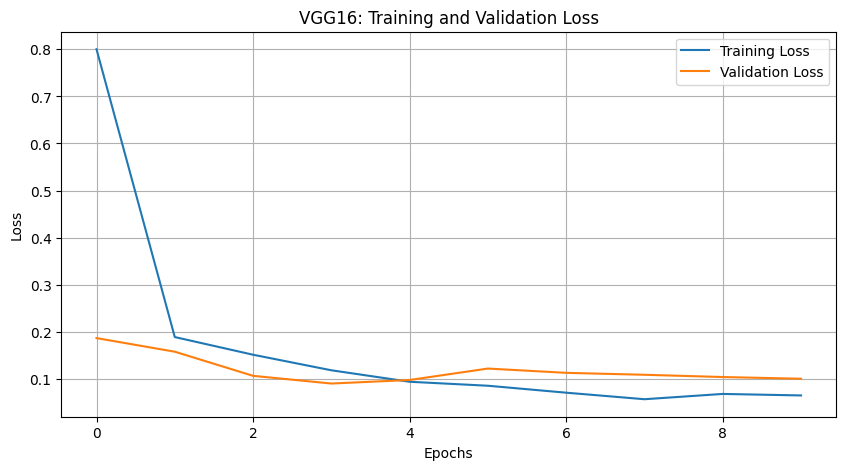

In [ ]:
# Plot Training and Validation Accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('VGG16: Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot Training and Validation Loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('VGG16: Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Transfer Learning - ResNet 50
resnet50 = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
resnet50.trainable = False  # Freeze the pre-trained layers

resnet50_model = tf.keras.models.Sequential([
    resnet50,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
resnet50_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
resnet50_model.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 7, 7, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 100352)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │      12,845,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 36,433,025 (138.98 MB)

 Trainable params: 12,845,313 (49.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:
history = resnet50_model.fit(x=training_set, validation_data=validation_set, epochs=10)
results["ResNet50"] = {'accuracy': history.history['val_accuracy'][-1]}

Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.5852 - loss: 0.9930 - val_accuracy: 0.5185 - val_loss: 0.6774
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 19s 568ms/step - accuracy: 0.5184 - loss: 0.7234 - val_accuracy: 0.5333 - val_loss: 0.6721
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 18s 639ms/step - accuracy: 0.5647 - loss: 0.6863 - val_accuracy: 0.5185 - val_loss: 0.6836
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 20s 711ms/step - accuracy: 0.5569 - loss: 0.6819 - val_accuracy: 0.5407 - val_loss: 0.6677
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 19s 721ms/step - accuracy: 0.5932 - loss: 0.6569 - val_accuracy: 0.5037 - val_loss: 0.6759
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 19s 677ms/step - accuracy: 0.5154 - loss: 0.6884 - val_accuracy: 0.6296 - val_loss: 0.6724
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 17s 729ms/step - accuracy: 0.6072 - loss: 0.6627 - val_accuracy: 0.5778 - val_loss: 0.6672
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 18s 715ms/step - accuracy: 0.6212 - loss: 0.6559 - val_accurac

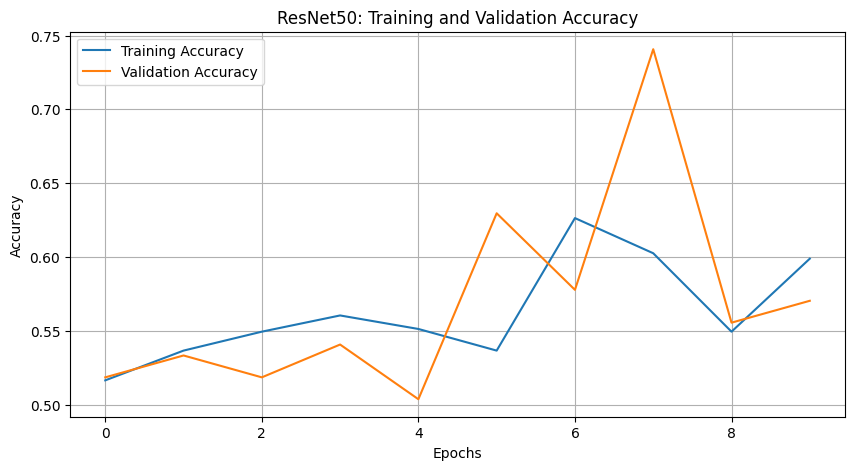

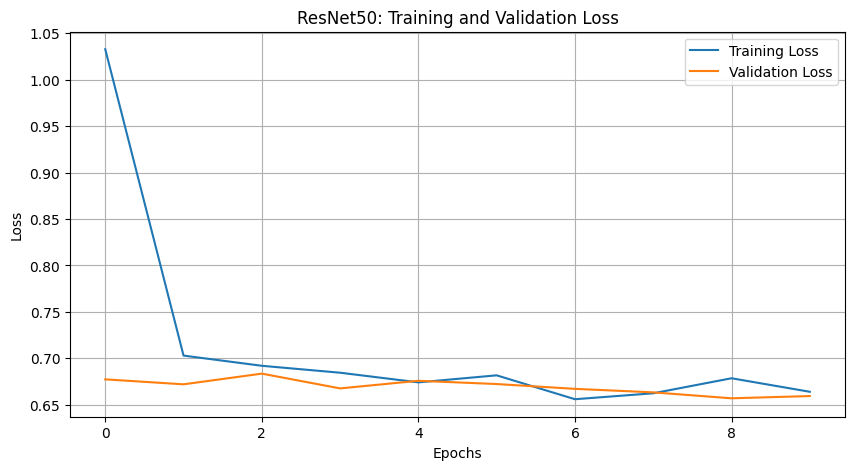

In [ ]:
# Plot Training and Validation Accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('ResNet50: Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot Training and Validation Loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('ResNet50: Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

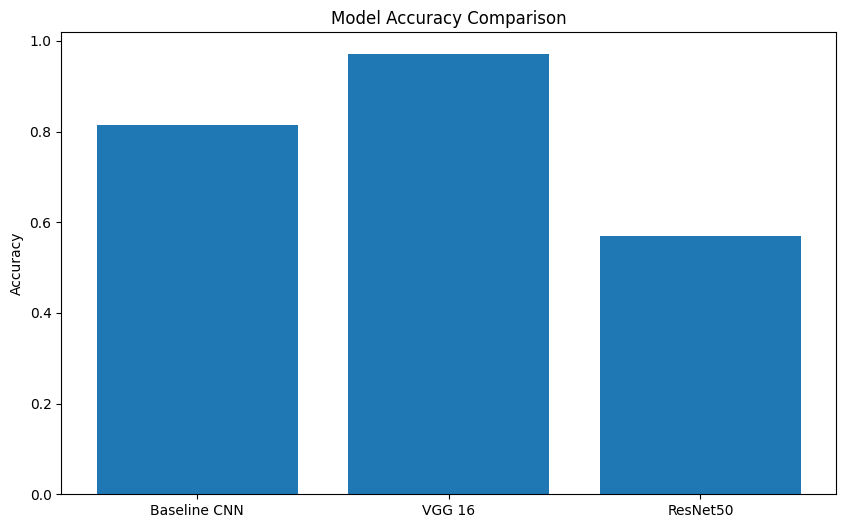

In [ ]:
# Plot Accuracy Comparision Across Models
accuracies = [results[model]['accuracy'] for model in results.keys()]
plt.figure(figsize=(10,6))
plt.bar(results.keys(), accuracies)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()